# Task 3 (HIV)

### Section 3.1

In [1]:
#import the neccessary libraries
import pandas as pd
import random as rd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

#load the dataset in pandaS
HIV = pd.read_csv('Task3 - dataset - HIV RVG.csv') 

#### You should then provide a statistical summary of the dataset (i.e. mean values, standard deviations, min/max values or each feature)

In [476]:
HIV.columns
#HIV.describe()

Index(['Image number', 'Bifurcation number', 'Artery (1)/ Vein (2)', 'Alpha',
       'Beta', 'Lambda', 'Lambda1', 'Lambda2', 'Participant Condition'],
      dtype='object')

#### you should normalise the data before starting training/testing any model and justify your decision.


In [478]:
#import normaliser to normalise the data
from sklearn.preprocessing import Normalizer

In [479]:
# Header values of integer type are stored in X
#Participant condition is another header of type string stored in y for the purpose of input and output components.
array = HIV.values

#8 features
X = array[:,0:8]
Y = array[:,8]

In [480]:
#here we normalise the data 
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [481]:
#2D numpy array 
dataset_np = HIV.to_numpy()
lables = HIV.columns

In [482]:
#Statistical summary, mean, median, min, max and standard deviation.
# This helps visualise and comprehend the large HIV dataset
for i in range(0,8): 
        print("values for: ", lables[i])
        print(lables[i], "Max: ", np.max(dataset_np[:,i]) )
        print(lables[i], "Min: ",  np.min(dataset_np[:,i]) )
        print(lables[i], "Mean: ", np.mean(dataset_np[:,i]) )
        print(lables[i], "Median: ", np.median(dataset_np[:,i]) )
        print(lables[i], "Standard Deviation: ", np.std(dataset_np[:,i]) )
        print()
        print()

values for:  Image number
Image number Max:  203
Image number Min:  1
Image number Mean:  107.35500933416304
Image number Median:  109.0
Image number Standard Deviation:  58.92403834129209


values for:  Bifurcation number
Bifurcation number Max:  25
Bifurcation number Min:  1
Bifurcation number Mean:  6.22059738643435
Bifurcation number Median:  5.0
Bifurcation number Standard Deviation:  4.102702846294904


values for:  Artery (1)/ Vein (2)
Artery (1)/ Vein (2) Max:  2
Artery (1)/ Vein (2) Min:  1
Artery (1)/ Vein (2) Mean:  1.5731176104542626
Artery (1)/ Vein (2) Median:  2.0
Artery (1)/ Vein (2) Standard Deviation:  0.49462492359510823


values for:  Alpha
Alpha Max:  2.356406419
Alpha Min:  0.092770246
Alpha Mean:  0.6153054535242671
Alpha Median:  0.620978196
Alpha Standard Deviation:  0.26520363332540575


values for:  Beta
Beta Max:  3.376730946
Beta Min:  0.283299475
Beta Mean:  1.5560927540494711
Beta Median:  1.5155616935
Beta Standard Deviation:  0.38766562089864853


value

#### To visualise the data, you need to generate two plots. The first one shall be a box plot, which will include the two classes (“Status”), i.e. control/patient, in the x-axis and the “Alpha” in the y-axis. 

In [483]:
#First convert dataset into dataframe and inorder to execute box plots
HIV_framed = pd.DataFrame(HIV)

In [484]:
#Storing headers into variables. #Storing the features in elements and Status variables helps evolve the efficiency and is possible that the memory is lessened .
elements = HIV_framed[['Image number','Bifurcation number', 'Artery (1)/ Vein (2)', 'Alpha','Beta', 'Lambda', 'Lambda1', 'Lambda2']]
Status = HIV_framed[['Participant Condition']]

## Box Plot

<Figure size 720x864 with 0 Axes>

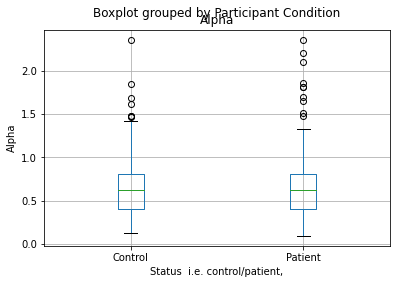

<Figure size 720x864 with 0 Axes>

In [485]:
HIV_framed.boxplot(column=["Alpha"], by="Participant Condition") 
plt.xlabel("Status  i.e. control/patient,")
plt.ylabel("Alpha")
plt.figure(figsize=(10,12))

## Density Plot

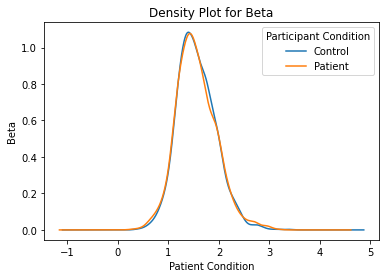

In [486]:
#Demonstrates HIV density plot.
HIV_density = HIV_framed.pivot(columns='Participant Condition', values = 'Beta')
HIV_density.plot.density()
plt.title('Density Plot for Beta')
plt.ylabel('Beta')
plt.xlabel('Patient Condition')
plt.show()

'What information can be obtained from each of these two plots? Can one use any of these two plots to identify outliers? If yes, please elaborate. Please include your explanation of implementation alongside the plots.'

# Section 3.2 (Implementation of ANN classifier for better accuracy)

#Normalise the HIV dataset

In [463]:
HIV_normalised = (X-np.min(X))/(np.amax(X)-np.amin(X))

Sigmoid Function for non linear activation function

In [464]:
#shuffle the data to ensure each data is varied, therefore we are seeing the plots and accuracy differ.
#This has the options to reomve trends that are heavilly correlated to the data entry order.It also removes any biases
randomState = np.random.RandomState(10)
HIV_normalised += 2 * randomState.uniform(size=HIV_normalised.shape)

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Text(0.5, 1.0, 'Accuracy against epochs')

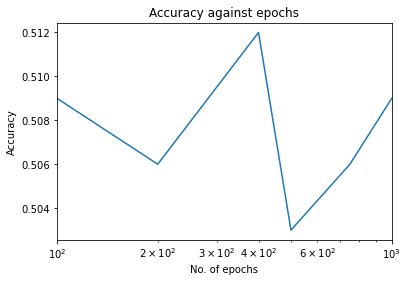

In [532]:
logisticFunc = 'logistic'

# Train & Test ANN classifer by splitting into 0.9 and 0.1
x_train, x_test, y_train, y_test = train_test_split(HIV_normalised, Status, test_size = 0.1,train_size=0.9)
#x_train, x_test, y_train, y_test = test_train_split(HIV_normalised, Status, train_size = 0.9)


#MLPClassifier is a feedforward ANN  model to maps training data sets to an appropriate output set.
Ann = MLPClassifier(solver='lbfgs', alpha=0, random_state=40, max_iter=1000,
        early_stopping=True, hidden_layer_sizes=[500, 500],# set the neurons in each layer to 500
        activation = logisticFunc)
Ann.out_activation_='logistic'# logistic output function for output later

# fit the data, to examine error through slicing, this here is done with taking an the array value from 1st index to last.
Ann.fit(x_train, y_train)
Ann.predict(x_test[:,:])

#The accuracy plot will keep changing due to the shuffling of data
accuracyANN=[]

#Each epoch has a variety of inputs
Epochs = [100,200,400,500,750,1000]
#the higher the epoch the dear the comnputation for the evaluation of model post testing.

#ANN
for artificialNeuralNetwork in Epochs:
    Ann = MLPClassifier(solver='lbfgs', alpha=0, max_iter=artificialNeuralNetwork,
    early_stopping=True, hidden_layer_sizes=[500, 500],#hidden layer size to 500

    activation = logisticFunc)
    
    
    ## now we shall the fit the data
    Ann.fit(x_train, y_train)
    Ann.predict(x_test[:,:])
    
    #for repeating the operation on all the ann accuracies for listed epochs
    accuracy = round(Ann.score(x_test, y_test),3)
    accuracyANN.append(accuracy)
    

#plot
#semilogx is  data  being visualised when x-axis is converted to log format. this produces better plots than .plot func.
plt.semilogx([100,200,400,500,750,1000], accuracyANN)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.xlim(100,1000)
plt.title('Accuracy against epochs')

In [533]:
print('The ANN accuracy for the following epoch neurons; 100,200,400,500,750,1000 are');print(accuracyANN);print('respectively')

The ANN accuracy for the following epoch neurons; 100,200,400,500,750,1000 are
[0.509, 0.506, 0.512, 0.503, 0.506, 0.509]
respectively


### A trial method that had led to higher and more efficient accuracy for ANN 

In [489]:
x = pd.DataFrame(HIV)
x = x.drop('Participant Condition', 1)
y = pd.DataFrame(HIV, columns=['Participant Condition'])

#Test split at 10% and train split at 90%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9) 



# The dataset here is to be normalised
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Epochs = [100,200,400,500,750,1000]
sizeEpochs = len(Epochs)
accuracyANN = [] 


for i in range(sizeEpochs):
    Ann = MLPClassifier(hidden_layer_sizes=(500, 500), activation='logistic', max_iter=1000, random_state=40)
    setattr(Ann, "out_activation_", "logistic")

    Ann.fit(x_train, y_train)
    Ann_predict = Ann.predict(x_test)
    updatedAccuracy = accuracy_score(y_test, Ann_predict)
    accuracyANN.append(updatedAccuracy)

print('The ANN accuracy for the following epochs; 100,200,400,500,750,1000 are');print(accuracyANN)

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

The ANN accuracy for the following epochs; 100,200,400,500,750,1000 are
[0.6273291925465838, 0.6273291925465838, 0.6273291925465838, 0.6273291925465838, 0.6273291925465838, 0.6273291925465838]


### Trial Method 2 for ANN accuracy

In [426]:
def accuracy(confusion_matrix):
   Sum = confusion_matrix.trace()
   totalSum = confusion_matrix.sum()
   return Sum / totalSum

epochs = 100
Ann = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=epochs,activation = 'logistic',solver='sgd',random_state=60)
Ann.fit(x_train, y_train)
y_pred = Ann.predict(x_test)
sumOfConfMatr = confusion_matrix(y_pred, y_test)
print("Artificial Neural Network Accuracy of MLP, epoch of 100 :" '', accuracy(sumOfConfMatr))

epochs = 200
Ann200 = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=epochs,activation = 'logistic',solver='sgd',random_state=60)
Ann200.fit(x_train, y_train)
y_pred200 = Ann.predict(x_test)
sumOfConfMatr200 = confusion_matrix(y_pred200, y_test)
print("Artificial Neural Network Accuracy of MLP, epoch of 200 :" '', accuracy(sumOfConfMatr200))

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Artificial Neural Network Accuracy of MLP, epoch of 100 : 0.5745341614906833


C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Artificial Neural Network Accuracy of MLP, epoch of 200 : 0.5745341614906833


## Training random tree classifier

In [490]:
x_train, x_test, y_train, y_test = train_test_split(HIV_normalised, Status, test_size = 0.1)#test 10%

#here we initiate RandomForestClassifier for the purpose of exaggerating tree information.
RTC = RandomForestClassifier(max_depth = 2, random_state = 40, min_samples_leaf = 5, n_estimators = 1000)#leaf node to 5
RTC.fit(HIV_normalised,Status)

#Here we are splitting and slicing to gain tree information
RTC.predict(x_test[:,:])
RTCaccuracy = round(RTC.score(x_test, y_test),3)

<ipython-input-490-ec0b883dd877>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)


<ipython-input-491-8d95fdbfe17f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-491-8d95fdbfe17f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-491-8d95fdbfe17f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-491-8d95fdbfe17f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-491-8d95fdbfe17f>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

Text(0.5, 1.0, 'Random forest classifier')

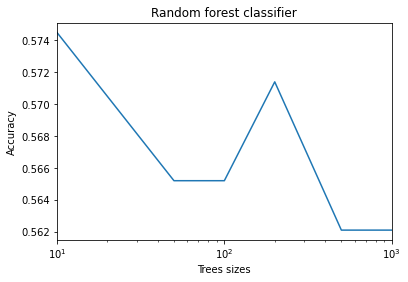

In [491]:
accuracyRTC = []# accuracy array

tree = [10,50,100,200,500,1000]# trees are defined in sizes
#increase the size will decresease the total outcome of trees to be implemented

# the sizes that are listed ensures efficiency wwhen making optimal use of all tree samples.

for randomForest in tree:
    RTC = RandomForestClassifier(max_depth = 2, min_samples_leaf = 5, n_estimators = randomForest)
    RTC.fit(HIV_normalised,Status)
    RTC.predict(x_test[:,:])
#    RTC.predict(x_test[:,:]): Classifier is ready to compute prediction when trees have made their own decision after testing, therefore  easily plots and outputs complete mean values    
    accuracy = round(RTC.score(x_test, y_test),4)
    accuracyRTC.append(accuracy)#adds an updated accuracy(accuracyRTC) to accuracy variable.
# This modifies the accuracy list by adding the implemented RTC variable (rtc at leaf node 5) to the end of the list,the list increases by one. 

#plot rtc
plt.semilogx([10,50,100,200,500,1000], accuracyRTC)
plt.xlabel('Trees sizes')
plt.ylabel('Accuracy')
plt.xlim(10,1000)
plt.title('Random forest classifier')


In [529]:
print('The Random Forest Tree accuracy at leaf node 5 for the following trees; 100,200,400,500,750,1000 are');print(accuracyRTC);print('respectively')

The Random Forest Tree accuracy at leaf node 5 for the following trees; 100,200,400,500,750,1000 are
[0.5994, 0.5807, 0.5839, 0.5839, 0.5932, 0.5963]
respectively


### Leaf = 10

In [493]:
x_train, x_test, y_train, y_test = train_test_split(HIV_normalised, Status, test_size = 0.1)

RTC = RandomForestClassifier(max_depth = 2, random_state = 40, min_samples_leaf = 10, n_estimators = 1000)
RTC.fit(HIV_normalised,Status)
RTC.predict(x_test[:,:])
RTCaccuracy = round(RTC.score(x_test, y_test),3)

<ipython-input-493-5156c88f2f12>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)


<ipython-input-495-49824e524d1f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-495-49824e524d1f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-495-49824e524d1f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-495-49824e524d1f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(HIV_normalised,Status)
<ipython-input-495-49824e524d1f>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

Text(0.5, 1.0, 'Random forest classifier')

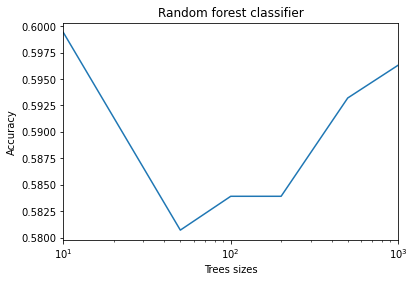

In [495]:
accuracyRTC = []

tree = [10,50,100,200,500,1000]
for randomForest in tree:
    RTC = RandomForestClassifier(max_depth = 2, min_samples_leaf = 10, n_estimators = randomForest)
    RTC.fit(HIV_normalised,Status)
    RTC.predict(x_test[:,:])
    accuracy = round(RTC.score(x_test, y_test),4)
    accuracyRTC.append(accuracy)


plt.semilogx([10,50,100,200,500,1000], accuracyRTC)
plt.xlabel('Trees sizes')
plt.ylabel('Accuracy')
plt.xlim(10,1000)
plt.title('Random forest classifier')


In [531]:
print('The Random Forest Tree accuracy at leaf node 10 for the following trees; 100,200,400,500,750,1000 are');print(accuracyRTC);print('respectively')

The Random Forest Tree accuracy at leaf node 10 for the following trees; 100,200,400,500,750,1000 are
[0.5994, 0.5807, 0.5839, 0.5839, 0.5932, 0.5963]
respectively


# Method 2 for RTC accuracy

In [499]:
x = pd.DataFrame(HIV)
x = x.drop('Participant Condition', 1)
y = pd.DataFrame(HIV, columns=['Participant Condition'])

#Test split at 10% and train split at 90%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9) 

# The dataset needs to be normalised
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


tree = [10,50,100,200,500,1000]
treelength = len(tree)
leaf5 = [] 
leaf10 = []

for i in range(treelength):
    #Training a Random Forest Classifier 
    RTC = RandomForestClassifier(n_estimators=tree[i], min_samples_leaf=5)
    RTC.fit(x_train, y_train)
    RTC_predict = RTC.predict(x_test)
    accuracy = accuracy_score(y_test, RTC_predict)
    leaf5.append(accuracy)
print('The Random Forest Tree accuracy at leaf node 5 for the following trees; 100,200,400,500,750,1000 are');print(leaf5)

<ipython-input-499-1a38133b30bb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-499-1a38133b30bb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-499-1a38133b30bb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-499-1a38133b30bb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-499-1a38133b30bb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

The Random Forest Tree accuracy at leaf node 5 for the following trees; 100,200,400,500,750,1000 are
[0.8043478260869565, 0.8043478260869565, 0.8291925465838509, 0.8385093167701864, 0.8260869565217391, 0.8291925465838509]


In [501]:
for i in range(treelength):
    #Training a Random Forest Classifier 
    RTC = RandomForestClassifier(n_estimators=tree[i], min_samples_leaf=10)
    RTC.fit(x_train, y_train)
    RTC_predict = RTC.predict(x_test)
    accuracy = accuracy_score(y_test, RTC_predict)
    leaf10.append(accuracy)
print('The Random Forest Tree accuracy at leaf node 10 for the following trees; 100,200,400,500,750,1000 are');print(leaf10)

<ipython-input-501-c671e821aa89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-501-c671e821aa89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-501-c671e821aa89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-501-c671e821aa89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RTC.fit(x_train, y_train)
<ipython-input-501-c671e821aa89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

The Random Forest Tree accuracy at leaf node 10 for the following trees; 100,200,400,500,750,1000 are
[0.7701863354037267, 0.7950310559006211, 0.7888198757763976, 0.7981366459627329, 0.7950310559006211, 0.7981366459627329]


## Section 3.3 Model Selection (10 fold cv)

 In this task, you are asked to use a 10-fold CV

In [2]:
#the tenFoldCv function is implemented to shuffle and split datasets into k sections.

def tenFoldCV(layersizes, x, y, k):
    annCV = MLPClassifier(hidden_layer_sizes=(layersizes,layersizes), activation='logistic')
    setattr(annCV, "out_activation_", "logistic")
    annCross = cross_val_score(annCV, x, y, cv=k,scoring='accuracy',n_jobs=-1) 
    #n_jobs= -1 is the input range value
    
#MEAN
    annMean = np.mean(annCross)  
    print('Mean accuracy for ANN  using 10 fold CV with', layersizes, 'neurons :');print(annMean)

    
    
HIV = shuffle(HIV)
x = pd.DataFrame(HIV)
x = x.drop('Participant Condition', 1)
y = pd.DataFrame(HIV, columns=['Participant Condition'])

k=10#process repeated k=10 times

#the repeat is done 10 times to process different kFold of varying sizes within the neurons/trees in each hidden layer, inorder to function the test and train of data
tenFoldCV(50, x, y, k)

Mean accuracy for ANN  using 10 fold CV with 50 neurons :
0.665532787678257


In [3]:
tenFoldCV(500, x, y, k)

Mean accuracy for ANN  using 10 fold CV with 500 neurons :
0.6456154099185387


In [4]:
tenFoldCV(1000, x, y, k)

Mean accuracy for ANN  using 10 fold CV with 1000 neurons :
0.6521613358874634


In [5]:
def tenFoldCV(tree, x, y, k):
    rtcCV = RandomForestClassifier(n_estimators=tree, min_samples_leaf=10)
    rtcCross = cross_val_score(rtcCV, x, y, cv=k,scoring='accuracy', n_jobs=-1)
    rtcMean = np.mean(rtcCross)
    print('Mean accuracy for Random Forest of 10 MSL',tree,' trees:');print(rtcMean)

HIV = shuffle(HIV)
x = pd.DataFrame(HIV)
x = x.drop('Participant Condition', 1)
y = pd.DataFrame(HIV, columns=['Participant Condition'])



k=10 
tenFoldCV(50,x,y,k)

Mean accuracy for Random Forest of 10 MSL 50  trees:
0.7815909134885162


In [6]:
tenFoldCV(500,x,y,k)


Mean accuracy for Random Forest of 10 MSL 500  trees:
0.792471120914843


In [7]:
tenFoldCV(1000,x,y,k)

Mean accuracy for Random Forest of 10 MSL 1000  trees:
0.7921624968557109


In [ ]:
print('Which parameters should we use for each of the two methods')
print('I would use the Random Forest method as it has better accuracy rates than ANN even with 10 CV fold')